link para o vídeo: [https://youtu.be/ebAmZkTIiG4](https://)



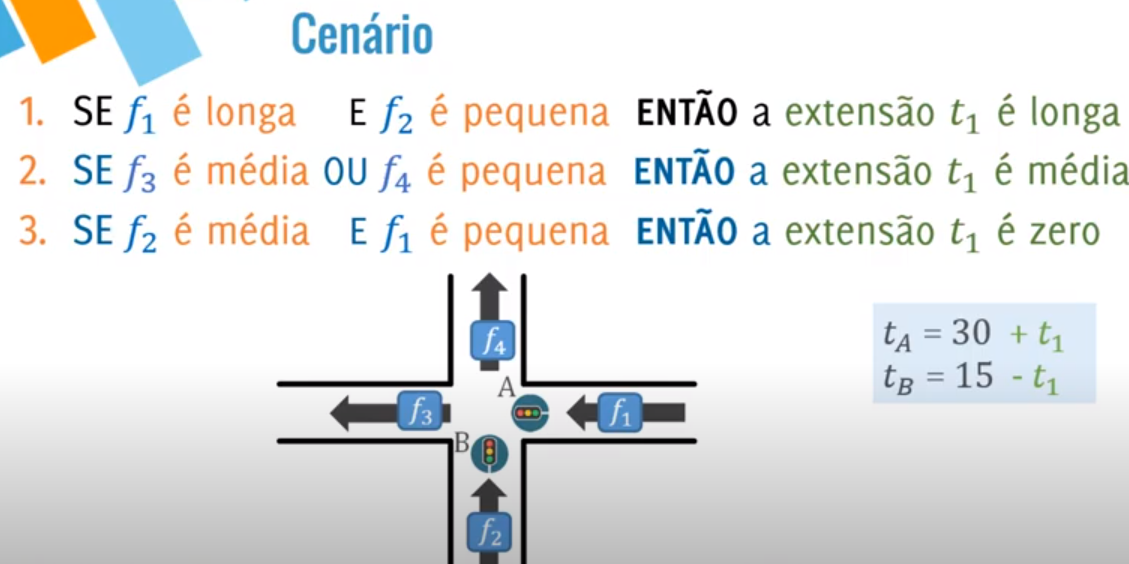

# Preâmbulo

In [26]:
#Instação do pacote skfuzzy
!pip install scikit-fuzzy

In [27]:
#Importar as bibliotecas básicas
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Importar as bibliotecas fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Processamento

In [29]:
np.arange(0, 21, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [30]:
dominio_fila = np.arange(0, 21, 1)#Antecedente
dominio_ext = np.arange(0, 21, 1)#Consequente

**Ciração das variáveis**

In [31]:
f1 = ctrl.Antecedent(dominio_fila, "f1")
f2 = ctrl.Antecedent(dominio_fila, "f2")
f3 = ctrl.Antecedent(dominio_fila, "f3")
f4 = ctrl.Antecedent(dominio_fila, "f4")

In [32]:
ext = ctrl.Consequent(dominio_ext, "ext")

**Definição das funções de pertinência**

In [33]:
#Funções de pertinência para o tamanho da fila 1
f1["pequena"] = fuzz.trimf(f1.universe, [0, 4, 8])#"Triangular Membership Function"
f1["media"] = fuzz.trimf(f1.universe, [4, 8, 12])#"Triangular Membership Function"
f1["longa"] = fuzz.trapmf(f1.universe, [8, 12, 20, 20])#"Trapezoidal Membership Function"

In [34]:
#Funções de pertinência para o tamanho da fila 2
f2["pequena"] = fuzz.trimf(f2.universe, [0, 4, 8])#"Triangular Membership Function"
f2["media"] = fuzz.trimf(f2.universe, [4, 8, 12])#"Triangular Membership Function"
f2["longa"] = fuzz.trapmf(f2.universe, [8, 12, 20, 20])#"Trapezoidal Membership Function"

In [35]:
#Funções de pertinência para o tamanho da fila 3
f3["pequena"] = fuzz.trimf(f3.universe, [0, 4, 8])#"Triangular Membership Function"
f3["media"] = fuzz.trimf(f3.universe, [4, 8, 12])#"Triangular Membership Function"
f3["longa"] = fuzz.trapmf(f3.universe, [8, 12, 20, 20])#"Trapezoidal Membership Function"

In [36]:
#Funções de pertinência para o tamanho da fila 4
f4["pequena"] = fuzz.trimf(f4.universe, [0, 4, 8])#"Triangular Membership Function"
f4["media"] = fuzz.trimf(f4.universe, [4, 8, 12])#"Triangular Membership Function"
f4["longa"] = fuzz.trapmf(f4.universe, [8, 12, 20, 20])#"Trapezoidal Membership Function"

In [37]:
#Funções de pertinência para a extensão de tempo t1
ext["zero"] = fuzz.trimf(ext.universe, [0, 0, 5])#"Triangular Membership Function"
ext["curta"] = fuzz.trimf(ext.universe, [0, 5, 10])#"Triangular Membership Function"
ext["media"] = fuzz.trimf(ext.universe, [5, 10, 15])#"Triangular Membership Function"
ext["longa"] = fuzz.trapmf(ext.universe, [10, 15, 20, 20])#"Trapezoidal Membership Function"

**Visualização das funções de pertinência para cada variável**

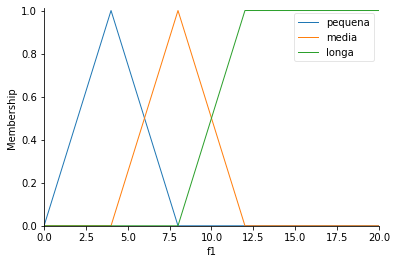

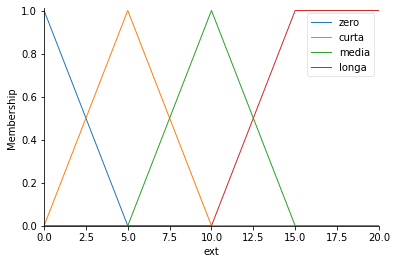

In [38]:
f1.view()
ext.view()

**Definição das regras**

In [39]:
regra1 = ctrl.Rule(f1["longa"] & f2["pequena"], ext["longa"])
regra2 = ctrl.Rule(f3["media"] | f4["pequena"], ext["media"])
regra3 = ctrl.Rule(f2["longa"] & f1["pequena"], ext["zero"])

**Criação do sistema**

In [40]:
semaforo_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [41]:
sA = ctrl.ControlSystemSimulation(semaforo_controle)

**Entrada de dados**

In [42]:
sA.input["f1"] = 10
sA.input["f2"] = 3
sA.input["f3"] = 0
sA.input["f4"] = 1

**Processamento**

In [43]:
sA.compute()

# Exibição dos resultados

In [44]:
sA.output
print("A extensão no semáforo A é de %s segundos" % float(sA.output["ext"]))

A extensão no semáforo A é de 13.926818014027317 segundos


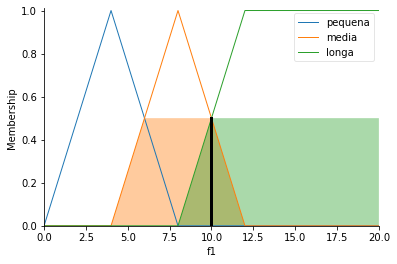

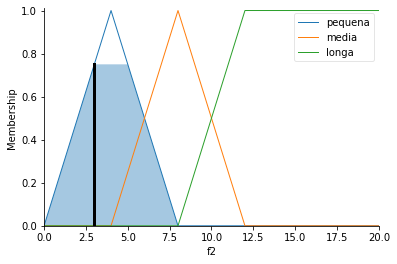

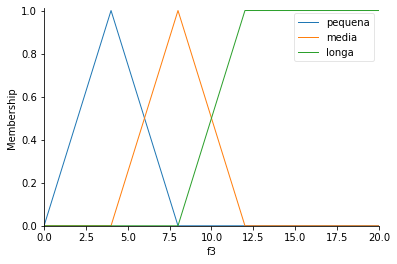

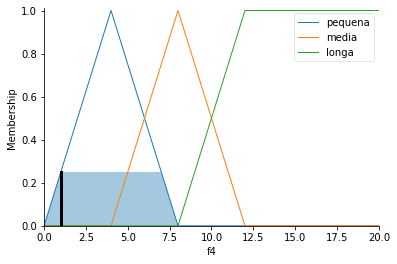

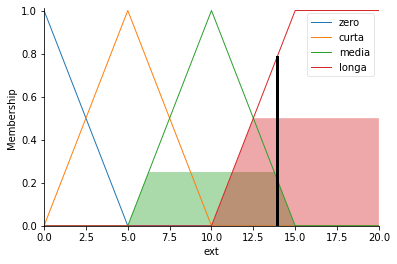

In [45]:
f1.view(sim = sA)#Visualizar a variável "f1", da simulação "sA"
f2.view(sim = sA)#Visualizar a variável "f2", da simulação "sA"
f3.view(sim = sA)#Visualizar a variável "f3", da simulação "sA"
f4.view(sim = sA)#Visualizar a variável "f4", da simulação "sA"
ext.view(sim = sA)#Visualizar a variável "ext", da simulação "sA"